# Linear Regression for Insurance Charges Prediction

This notebook demonstrates how to build a linear regression model to predict insurance charges based on various features of a patient.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

## Load and Preprocess Data

In [2]:
# load the dataset
df = pd.read_csv("../numerical dataset/insurance.csv")

# hn5tar el feature we hnconvert el strings l numerical
df = df.drop(['region'] ,axis=1)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [3]:
# hndisplay the first few rows
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [4]:
# check null
print("Null values check:")
print(df.isna().sum())

Null values check:
age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64


## exploratory Data Analysis

In [5]:
# information about data
print("dataframe shape:", df.shape)
print("\nDataframe info:")
df.info()

dataframe shape: (1338, 6)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [6]:
print("\ndataframe description:")
print(df.describe())


dataframe description:
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010  


Text(0.5, 1.0, 'distribution of insurance Charges')

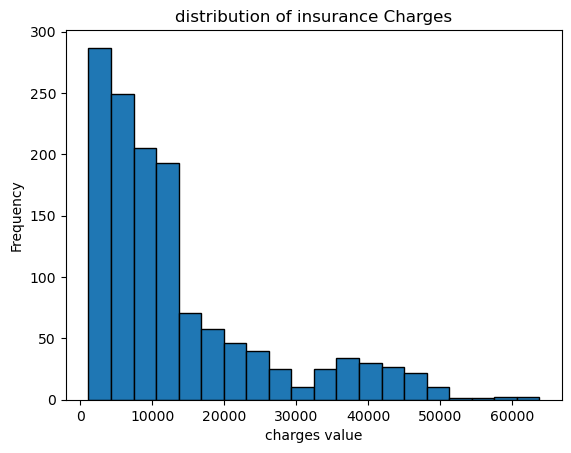

In [7]:
# Plot the distribution of charges
plt.hist(df['charges'], bins=20 ,edgecolor='black')
plt.xlabel('charges value')
plt.ylabel('Frequency')
plt.title('distribution of insurance Charges')

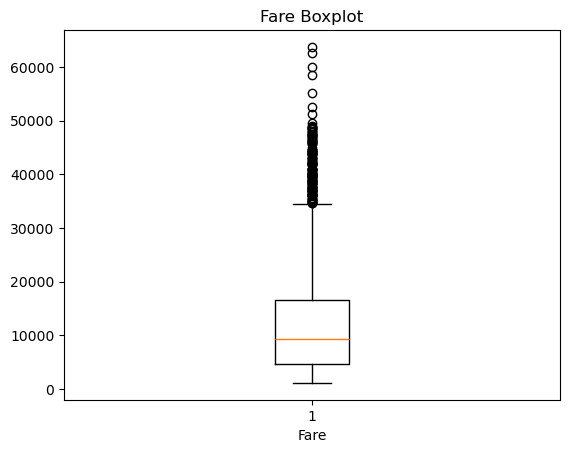

In [8]:
# to know if there is outlier
plt.boxplot(df['charges'])
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

##  remove outlier

In [9]:
# remove outliers using the IQR 
q1 = df['charges'].quantile(q=0.25)
q3 = df['charges'].quantile(q=0.75)

iqr = q3 - q1

min_val = q1 - 1.5 * iqr
max_val = q3 + 2.5 * iqr #lma kant 1.5 kan fe error a3la fa grbna nzwd el error 2lt (R2)

print(f"original shape: {df.shape}")

# Filter the dataframe to remove outliers
df = df[(df['charges'] >= min_val) & (df['charges'] <= max_val)]

print(f"shape after removing outliers: {df.shape}")

original shape: (1338, 6)
shape after removing outliers: (1309, 6)


## model Training

In [10]:
# split data
y = df['charges']
X = df.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=10)

#applayingg model
linr = LinearRegression()
linr.fit(X_train, y_train)

# make predictions
y_predict = linr.predict(X_test)

## Model evaluation

In [11]:
# evaluate the model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'mean Squared Error: {mse}')
print(f'mean Absolute Error: {mae}')
print(f'accuracy (R2 Score): {r2*100}')
print(f'Root Mean Squared Error: {rmse}')

mean Squared Error: 30480142.757500757
mean Absolute Error: 3863.777384796155
accuracy (R2 Score): 76.06309440800538
Root Mean Squared Error: 5520.882425618278


## visualization of results

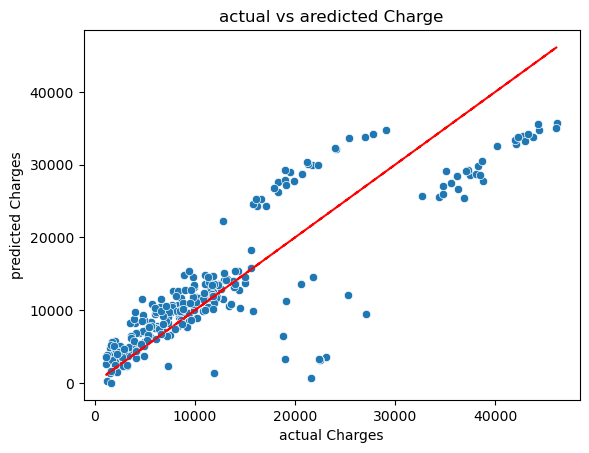

In [12]:
# actual vs predicted values
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel("actual Charges")
plt.ylabel("predicted Charges")
plt.title("actual vs aredicted Charge")
plt.plot(y_test,y_test, color='red', linestyle='--')
plt.show()

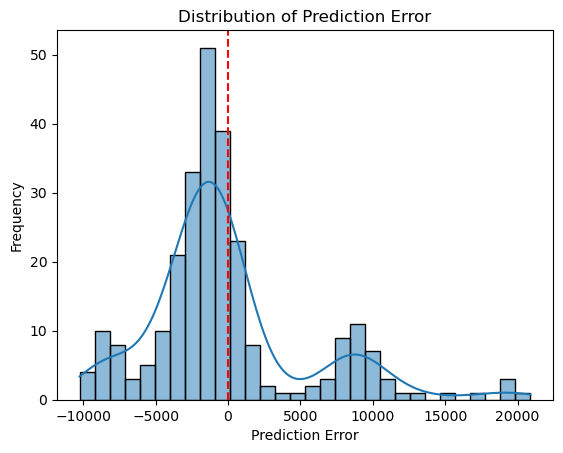

In [13]:
# Plot the distribution of the prediction error
the_error = y_test - y_predict
sns.histplot(the_error, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Error')
plt.show()

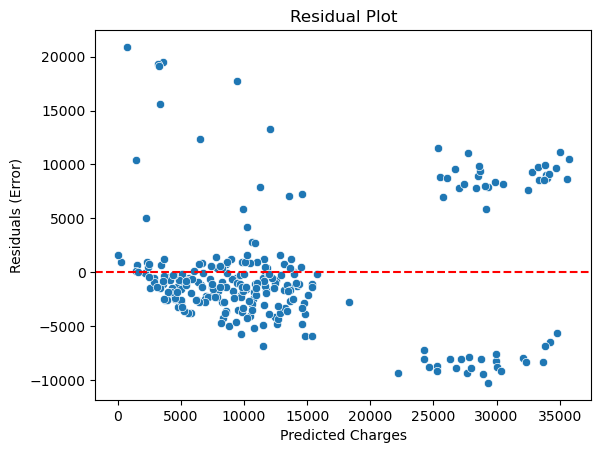

In [14]:
residuals = y_test - y_predict
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

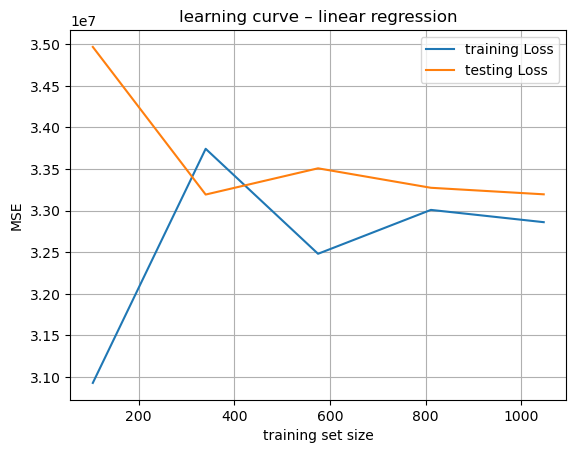

In [15]:
#hena bya5od eldata welmodel we by3ml cross valid. we yrg3lk
#train size deh btrg3lk feha array l 7dm eldata ele 5dha kol mara 3ml 3aliha training
#train score byrg3lk feha array 2d mn el - mse 3la eldata deh fe halet eltrain [[-30, -28, -32, -31, -29],[-25, -24, -26, -24, -25]]
#test score zayaha zy ele fo2 bs fe halet el test
train_sizes ,train_scores, test_scores = learning_curve(
    linr ,
    X=X ,
    y=y ,
    cv=5 ,
    scoring='neg_mean_squared_error')

#bagib el avg lkol mara mn el 5 34an a3mlha plot we bahot - 34an arg3ha 
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='training Loss')
plt.plot(train_sizes, test_scores_mean, label='testing Loss')

plt.xlabel("training set size")
plt.ylabel("MSE")
plt.title("learning curve – linear regression")
plt.legend()
plt.grid()